## Demo of bmtool synaptic tuner
#### By Gregory Glickert
### First we must define some general settings and the settings for the connection we would like to tune. Below is an example of what this could look like for excitatory and inhibitory connections. Currently all of these settings, but the ones in the spec_syn_param are needed in order to use the tuner. You can copy all of the general_settings as these should be general enough to use for any case. The spec_settings are going to depend on your exact use case and connection type. 

In [1]:
general_settings = {
    'vclamp': True, # if vclamp should start on or off used mostly for singleEventv
    'rise_interval': (0.1, 0.9), #10-90%
    'tstart': 500., # when the singleEvent should start
    'tdur': 100.,    # Dur of sim after single synaptic event has occured
    'threshold': -15., #threshold for spike in mV
    'delay': 1.3, # netcon delay
    'weight': 1., # netcon weight
    'dt': 0.025, # simulation dt
    'celsius': 20 # temp of sim
}

conn_type_settings = {
    'Fac2FSI': { # facilitating synapse 
        'spec_settings': {
            'post_cell': 'FSI_Cell', 
            'vclamp_amp' : -70., 
            'sec_x': 0.5, 
            'sec_id': 1,  
            "level_of_detail": "AMPA_NMDA_STP",
        },
        'spec_syn_param': {
            'initW': 0.76,
            'tau_r_AMPA': 0.45,
            'tau_d_AMPA': 7.5,
            'Use': 0.13,
            'Dep': 0.,
            'Fac': 200.
        },
    },
    'Dep2FSI': { # depressing synapse
        'spec_settings': {
            'post_cell': 'FSI_Cell',
            'vclamp_amp': -55,
            'sec_x': 0.5,
            'sec_id':0,
            "level_of_detail": "GABA_A_STP",
        },
        'spec_syn_param': {
            'initW': 20,
            'tau_r_GABAA': 0.9,
            'tau_d_GABAA': 15,
            'e_GABAA':-75,
            'Use': 0.4,
            'Dep': 190.,
            'Fac': 0.
        },
    },

}

### Then the modfiles must be compiled in order for the tuner to work properly 

In [2]:
import os

# if already compiled then lets delete the folder and force a recompile
if os.path.isdir('modfiles/x86_64'):
    os.system("rm -rf modfiles/x86_64 ")
# compile the mod files
if not os.path.isdir("modfiles/x86_64"):
    os.chdir('modfiles')
    os.system("nrnivmodl")
    os.chdir("..")

/home/gjgpb9/miniconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles
Mod files: "./AMPA_NMDA_STP.mod" "./cadad.mod" "./cal2.mod" "./can_mig.mod" "./exp2syn_stp.mod" "./GABA_A_STP.mod" "./gap.mod" "./Gfluct.mod" "./h_kole.mod" "./imCA3.mod" "./kap_BS.mod" "./kBK.mod" "./kdmc_BS.mod" "./kdr_BS.mod" "./kdrCA3.mod" "./kdrinter.mod" "./leak.mod" "./nainter.mod" "./napCA3.mod" "./natCA3.mod" "./nax_BS.mod" "./vecevent_coreneuron.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../AMPA_NMDA_STP.mod
 -> NMODL ../cadad.mod
 -> NMODL ../cal2.mod
 -> NMODL ../can_mig.mod
 -> NMODL ../exp2syn_stp.mod
 -> NMODL ../GABA_A_STP.mod
 -> NMODL ../gap.mod
 -> NMODL ../Gfluct.mod
 -> NMODL ../h_kole.mod
 -> NMODL ../imCA3.mod
 -> NMODL ../kap_BS.mod


Translating AMPA_NMDA_STP.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/AMPA_NMDA_STP.c
Translating cadad.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/cadad.c
Translating cal2.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/cal2.c
Thread Safe
Thread Safe
Thread Safe
Translating can_mig.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/can_mig.c
Thread Safe
Translating exp2syn_stp.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/exp2syn_stp.c
Translating GABA_A_STP.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/GABA_A_STP.c
Translating gap.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/gap.c
Thread Safe
Thread Safe
Thread Safe
Translating Gfluct.mod into /home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles/x86_64/Gfluct.c
Notice: This mechanism cannot be used 

 -> NMODL ../kBK.mod
 -> NMODL ../kdmc_BS.mod
 -> NMODL ../kdr_BS.mod
 -> NMODL ../kdrCA3.mod
 -> NMODL ../kdrinter.mod
 -> NMODL ../leak.mod
 -> NMODL ../nainter.mod
 -> NMODL ../napCA3.mod
 -> NMODL ../natCA3.mod
 -> NMODL ../nax_BS.mod
 -> NMODL ../vecevent_coreneuron.mod
 -> Compiling AMPA_NMDA_STP.c
Notice: ARTIFICIAL_CELL is a synonym for POINT_PROCESS which hints that it
only affects and is affected by discrete events. As such it is not
located in a section and is not associated with an integrator
 -> Compiling cadad.c
 -> Compiling cal2.c
 -> Compiling can_mig.c
 -> Compiling exp2syn_stp.c
 -> Compiling GABA_A_STP.c
 -> Compiling gap.c
 -> Compiling Gfluct.c
 -> Compiling h_kole.c
 -> Compiling imCA3.c
 -> Compiling kap_BS.c
 -> Compiling kBK.c
 -> Compiling kdmc_BS.c
 -> Compiling kdr_BS.c
 -> Compiling kdrCA3.c
 -> Compiling kdrinter.c
 -> Compiling leak.c
 -> Compiling nainter.c
 -> Compiling napCA3.c
 -> Compiling natCA3.c
 -> Compiling nax_BS.c
 -> Compiling vecevent_coren

### Now we can initialize the synaptic tuner. You must call the SingleEvent method before using the interactiveTuner. When initializing you will have to change a few arguments depending on your use case. other_vars_to_record can be any variable in your synaptic mechanism, while slider_vars can be any range variable you wish to tune in the synapse. If the variable is not defined in the spec_syn_param than the tuner will get the value from the mechanism and try to set up some sliders to tune it.

In [3]:
mechanisms_dir = 'modfiles'
templates_file = 'templates.hoc'
#json_folder_path = os.path.join('..', 'Model-Parameters' , 'components', 'synaptic_models','synapses_M1_match')
# Initialize our tuner
from bmtool.synapses import SynapseTuner
tuner = SynapseTuner(mechanisms_dir=mechanisms_dir, # where x86_64 is located
                    templates_dir=templates_file, # where the neuron templates are located
                    conn_type_settings=conn_type_settings, # dict of connection settings
                    general_settings = general_settings, # dict of general settings
                    connection = 'Fac2FSI', # key in connection settings for which connection you want to tune
                    #json_folder_path=json_folder_path, # If your network uses json files the path can be set to update the connection settings based on the keys and values in the json
                    current_name = 'i', # name of current variable in synapase
                    other_vars_to_record = ['record_Pr', 'record_use'], # Other synaptic variables you wish to record besides the normal ones
                    slider_vars=['initW','Dep','Fac','Use','tau_r_AMPA','tau_d_AMPA']) # Range variables you want to tune to adjust synaptic response.


--No graphics will be displayed.


### The SingleEvent method will run a short pulse and then print out the synaptic properties for the synapse.  

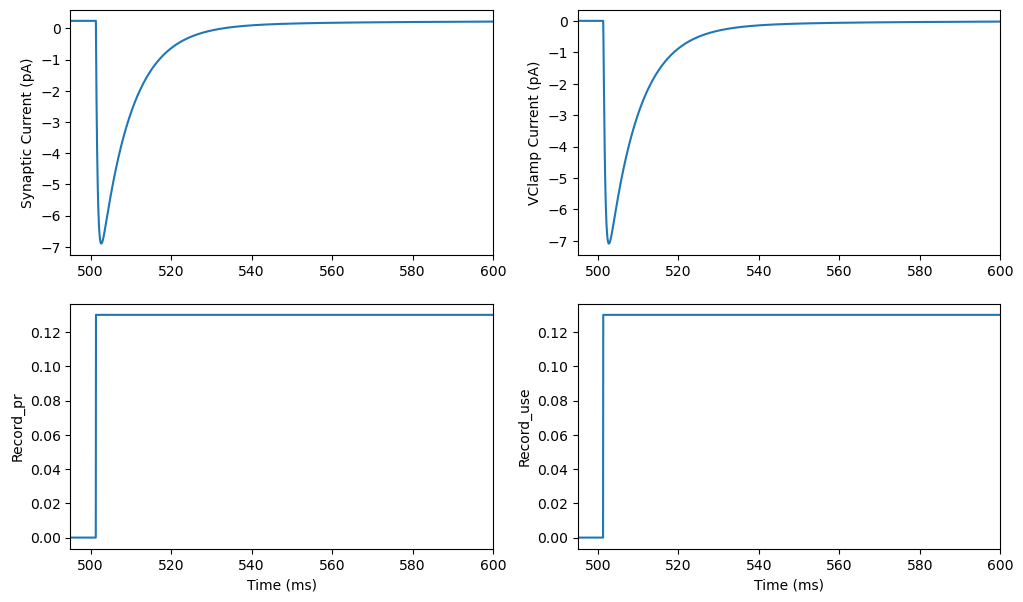

('baseline', -0.0002407732493736603)
('sign', -1.0)
('latency', 1.35)
('amp', 0.007084197529025005)
('rise_time', 0.7000000000000001)
('decay_time', 8.155594566100724)
('half_width', 8.275)
Current Integral in pA: 73.67


In [4]:
tuner.SingleEvent()

### The InteractiveTuner will deliver an input to the cell at a desired weight and frequency. The frequency by default will be 8 spikes then a 250ms delay and then 4 more spikes. 

Paired-pulse ratio is (Avg 2nd pulse - Avg 1st pulse) ÷ 90th percentile amplitude.

Induction is (Avg (6th, 7th, 8th pulses) - Avg 1st pulse) ÷ 90th percentile amplitude. 

Recovery is (Avg (9th, 10th, 11th, 12th pulses) - Avg (1st, 2nd, 3rd, 4th pulses)) ÷ 90th percentile amplitude

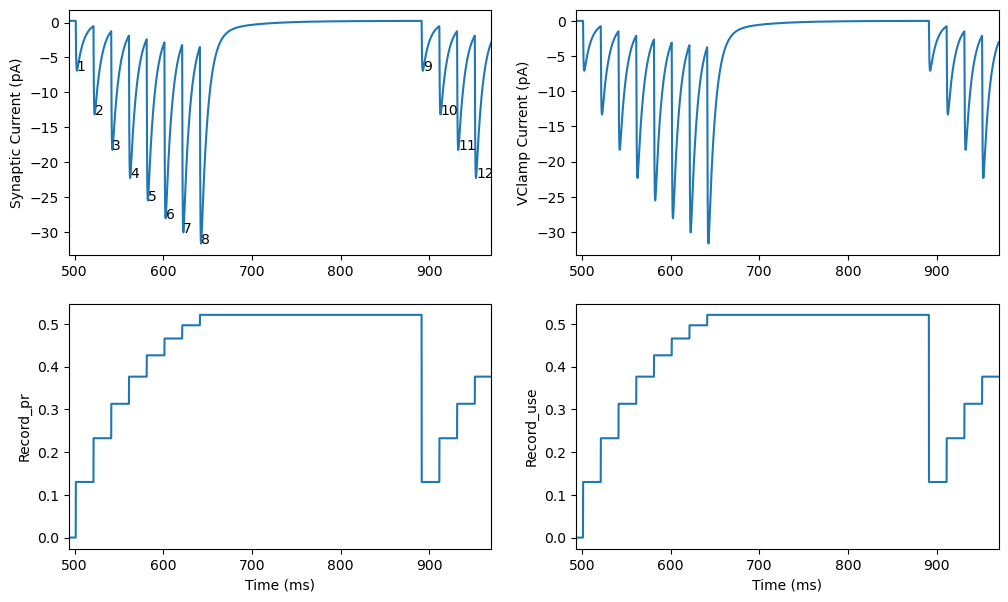


Short Term Plasticity Results for 50Hz with 250 Delay
PPR: Above 1 is facilitating, below 1 is depressing.
Induction: Above 0 is facilitating, below 0 is depressing.
Recovery: A measure of how fast STP decays.

Paired Pulse Response (PPR)
Calculation: 2nd pulse / 1st pulse
Values: ([[13.16]]) / ([[6.89]]) = [[1.91]]

Induction
Calculation: (avg(6th, 7th, 8th pulses) - 1st pulse) / max amps
Values: avg([[28.  , 30.02, 31.62]]) - [[6.89]] / [31.62]
([29.88]) - ([6.89]) / [31.62] = 0.727

Recovery
Calculation: (avg(9th, 10th, 11th, 12th pulses) - avg(1st to 4th pulses)) / max amps
Values: avg([[ 6.9 , 13.16, 18.21, 22.25]]) - avg([[ 6.89, 13.16, 18.21, 22.24]]) / [31.62]
([15.13]) - ([15.13]) / [31.62] = 0.000




In [5]:
tuner.InteractiveTuner()

### We can also see how the STP parameters vary with different train frequencies 

Analyzing frequencies:   0%|          | 0/16 [00:00<?, ?it/s]

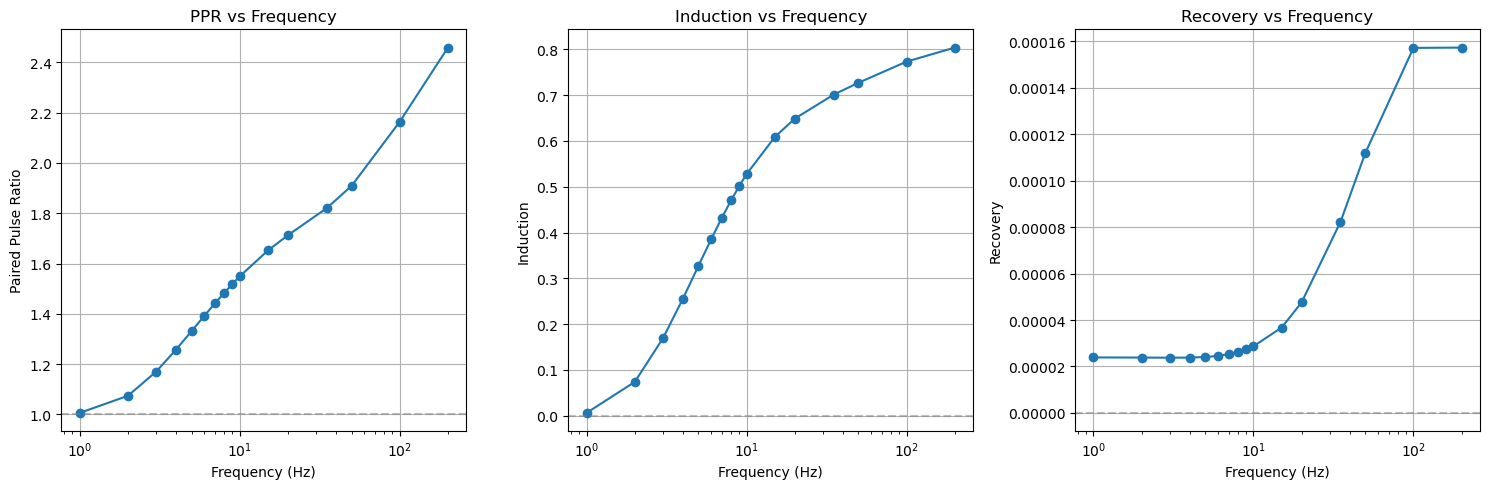

In [6]:
results = tuner.analyze_frequency_response()

### If we don't feel like tuner by hand we can also try to optimize an output of our model. In this example we will optimize and find the best STP parameters that give the induction and paired pulse response we want. Something to note is that the optimizer does not know what the trace should look like and only knows the features. So it might get some wild trace that happens to work. Also if you are using the random init_guess and don't like the voltage trace then run it again. The seed is different each time so the optimization will be different and can result in a better fit.

### Let's run the optimizer

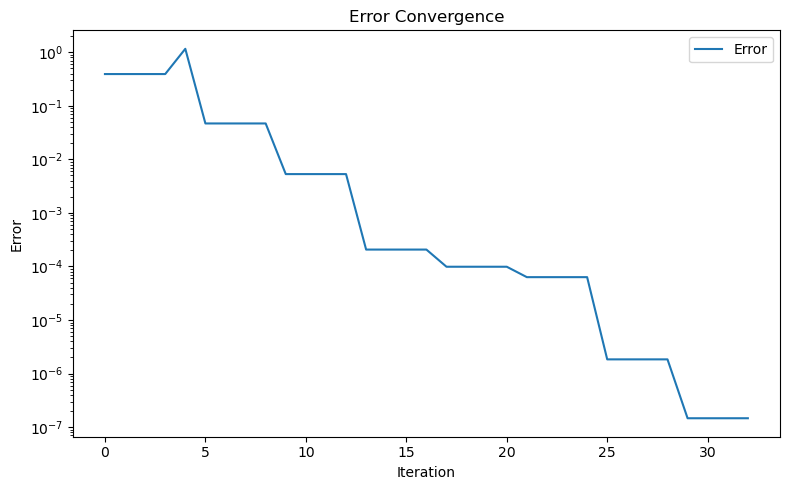

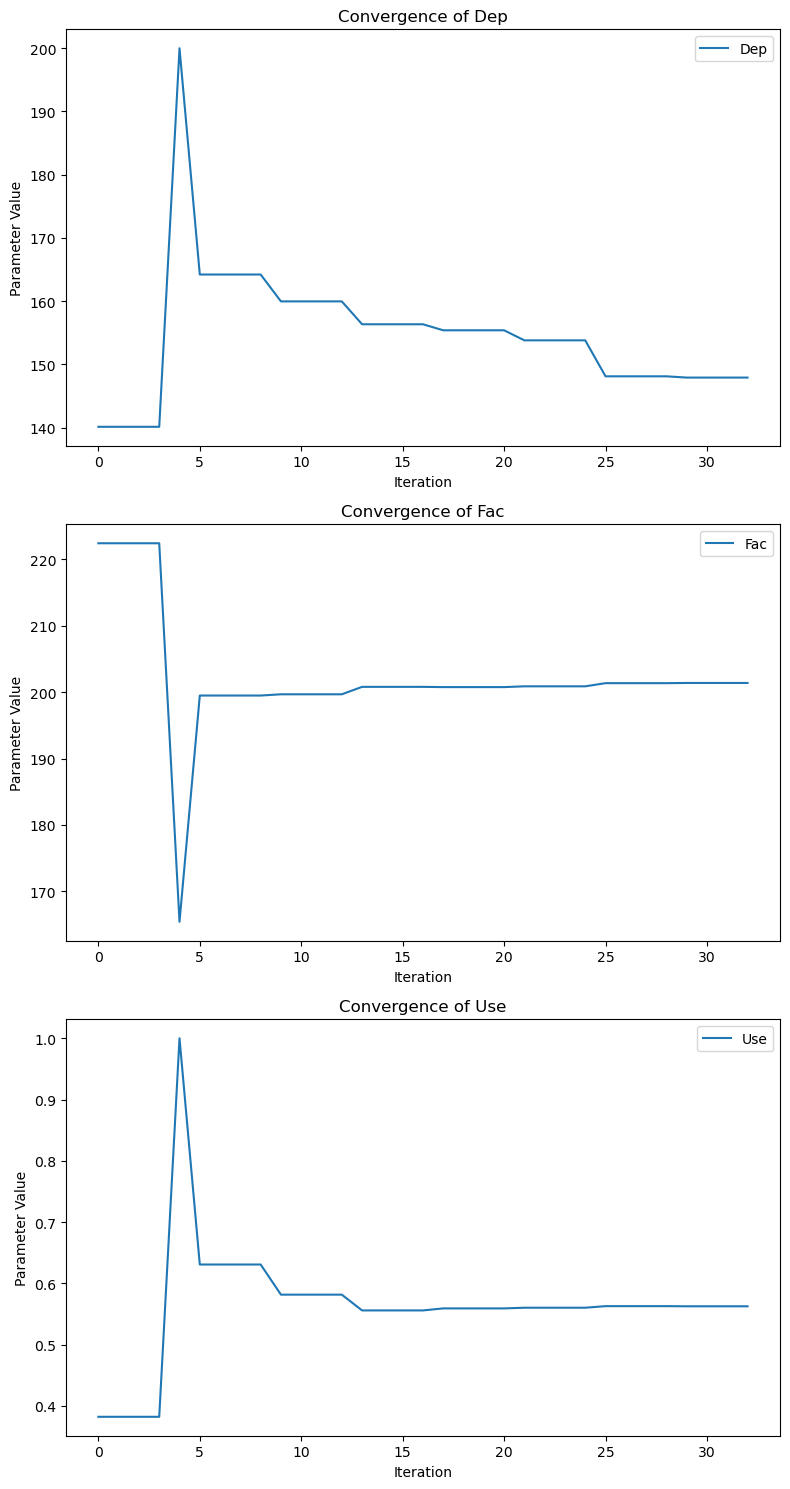

Optimization Results:
Final Error: 1.47e-07

Target Metrics:
induction: -0.750 (target: -0.750)
ppr: 0.800 (target: 0.800)
recovery: 0.000 (target: 0.000)
max_amplitude: 30.619 (target: 25.000)

Optimal Parameters:
Dep: 147.920
Fac: 201.392
Use: 0.563


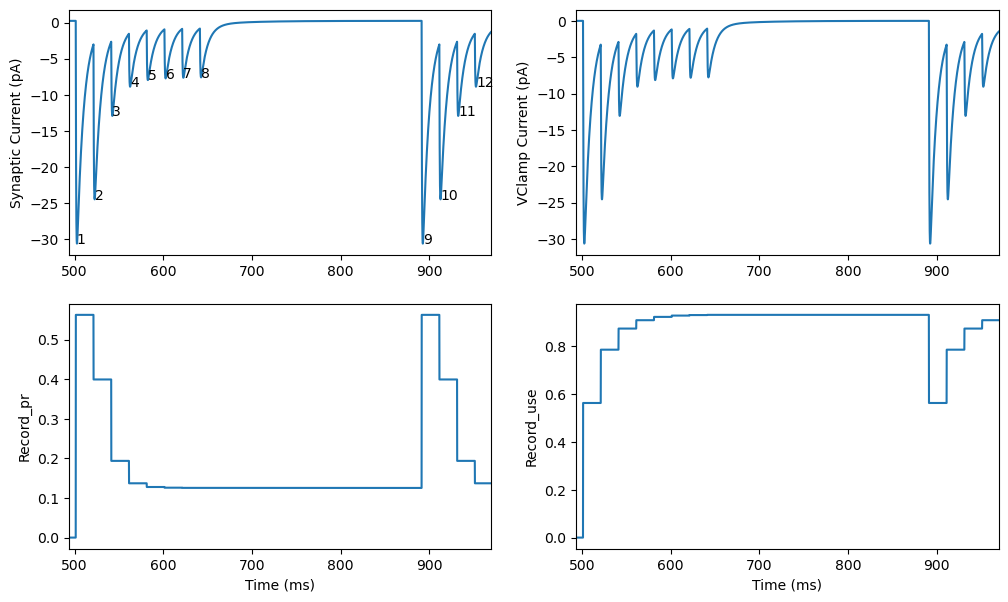


Short Term Plasticity Results for 50Hz with 250 Delay
PPR: Above 1 is facilitating, below 1 is depressing.
Induction: Above 0 is facilitating, below 0 is depressing.
Recovery: A measure of how fast STP decays.

Paired Pulse Response (PPR)
Calculation: 2nd pulse / 1st pulse
Values: ([[24.49]]) / ([[30.62]]) = [[0.8]]

Induction
Calculation: (avg(6th, 7th, 8th pulses) - 1st pulse) / max amps
Values: avg([[7.73, 7.64, 7.59]]) - [[30.62]] / [30.62]
([7.65]) - ([30.62]) / [30.62] = -0.750

Recovery
Calculation: (avg(9th, 10th, 11th, 12th pulses) - avg(1st to 4th pulses)) / max amps
Values: avg([[30.62, 24.49, 12.93,  8.88]]) - avg([[30.62, 24.49, 12.93,  8.88]]) / [30.62]
([19.23]) - ([19.23]) / [30.62] = 0.000




In [9]:
from bmtool.synapses import SynapseOptimizer
# Create the optimizer
optimizer = SynapseOptimizer(tuner)

# Define parameter bounds these can be any range variable you wish to tune
param_bounds = {
    'Dep': (0, 200.0),
    'Fac': (0, 400.0),
    'Use': (0.1, 1.0)
}

# Define target metrics these are the metrics that the tuner will try to automatic get the synapse to respond with
# max amps is an absolute value
target_metrics = {
    'induction': -0.75,
    'ppr': 0.8,
    'recovery': 0.0,
    'max_amplitude':25 # note if you get rid of the max amps in the cost function the fit will normally be better. Then you could scale the max amps with the initW
                       # This wont always be the case, but for this synapse Use controls STP and max amps so it can sometimes struggle to fit.
}

# currently the only metrics in the SynapseOptimizer are induction, prr, recovery, and max amplitude.
def custom_cost(metrics, targets):
    induction_error = (metrics['induction'] - targets['induction']) ** 2
    ppr_error = (metrics['ppr'] - targets['ppr']) ** 2
    recovery_error = (metrics['recovery'] - targets['recovery']) ** 2
    max_amp_errror = (metrics['max_amplitude'] - targets['max_amplitude']) ** 2
    # can weight each error term differently like this 
    return induction_error + 3 * ppr_error + recovery_error + 0.5*max_amp_errror

# Run optimization with custom cost function
result = optimizer.optimize_parameters(
    target_metrics=target_metrics,
    param_bounds=param_bounds,
    train_frequency=50, 
    train_delay=250,   
    init_guess='random', # either random or middle_guess. Random will start the synapse witha random value in the param_bound. Middle guess will pick the middle value in the param_bounds
    cost_function=custom_cost,
    method='SLSQP' # I believe this will be the fastest method, but you may try others check out https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.optimize.minimize.html
)

# Plot results
optimizer.plot_optimization_results(result)

### If there is a need for faster optimization with more parameters or more complex metrics the SynapseOptimize could be modifed to use [jax](https://jax.readthedocs.io/en/latest/index.html) and the [scipy method](https://jax.readthedocs.io/en/latest/_autosummary/jax.scipy.optimize.minimize.html). I did not look into this much as my use case currently only takes around 1 min to optimize. Also for the example provided it is important to note that we are using bounded optimizing methods since the Use parameter can not go above one. If there is a case where the parameters have no upper or lower bounds one could look into other optimizing methods